In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

df = pd.read_csv("house_data.csv")
df.info()
pd.set_option('display.max_columns',None)
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21466 entries, 0 to 21465
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21466 non-null  int64  
 1   date           21466 non-null  int64  
 2   price          21466 non-null  float64
 3   bedrooms       21466 non-null  int64  
 4   bathrooms      21466 non-null  float64
 5   sqft_living    21466 non-null  int64  
 6   sqft_lot       21466 non-null  int64  
 7   floors         21466 non-null  float64
 8   waterfront     21466 non-null  int64  
 9   view           21466 non-null  int64  
 10  condition      21466 non-null  int64  
 11  grade          21466 non-null  int64  
 12  sqft_above     21466 non-null  int64  
 13  sqft_basement  21466 non-null  int64  
 14  yr_built       21466 non-null  int64  
 15  yr_renovated   21466 non-null  int64  
 16  zipcode        21466 non-null  int64  
 17  lat            21466 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sale
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,20140512,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
6,1321400060,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014
7,2008000270,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015
8,2414600126,20150415,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015
9,3793500160,20150312,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015


## 0. Création du dataset

<Axes: title={'center': 'prix en fonction des m2 habitable'}, xlabel='sqft_living', ylabel='price'>

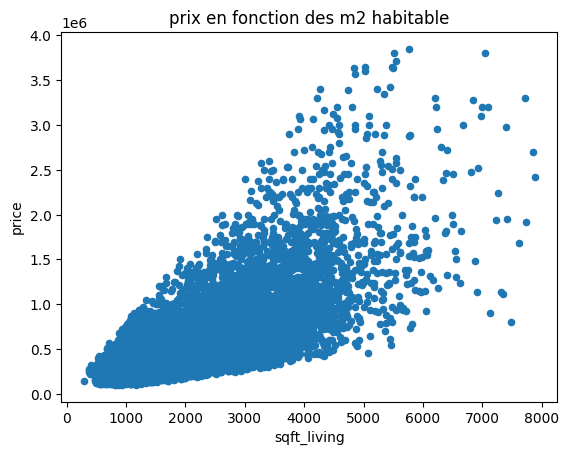

In [10]:
df.plot(kind="scatter", x= "sqft_living", y="price", title="prix en fonction des m2 habitable")

<Axes: title={'center': 'prix en fonction du nombre de chambres'}, xlabel='bedrooms', ylabel='price'>

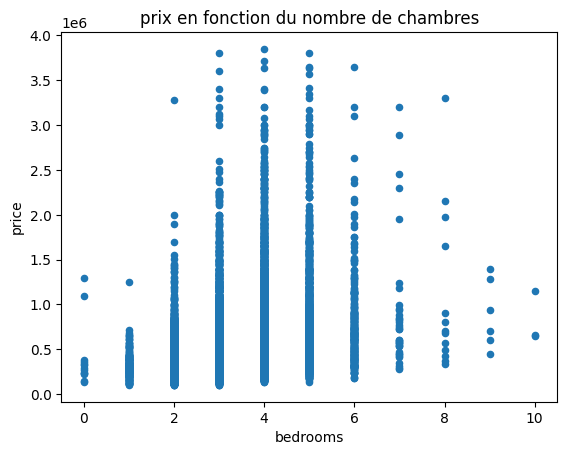

In [6]:
df.plot(kind="scatter", x= "bedrooms", y="price", title="prix en fonction du nombre de chambres")

## 1. Initialisation d'un estimateur

In [2]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

On commence par importer le modèle qu'on souhaite utiliser. On l'initialise en définissant ses hyperparamètres.

Ici on va prendre l'exemple de la régression linéaire regularisée à l'aide par Ridge qui prend un seul paramètre "alpha".

In [8]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=4)

print(model, type(model))

KNeighborsRegressor(n_neighbors=4) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


## 2. Entrainer le modèle avec la méthode .fit()

In [9]:
trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor(n_neighbors=4) <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


## 3. Evaluer le modèle avec la méthode .score()

In [10]:
trained_model.score(X_test,y_test)

0.39370291642498423

## 4. Prédire avec la méthode .predict()

In [11]:
predict = trained_model.predict(X_test.head(1))
real = y.head(1).values

print(f"la valeur prédite est {predict}, alors que la valeur réelle est {real}")

la valeur prédite est [331000.], alors que la valeur réelle est [221900.]


# II La classe transformeur

In [12]:
# initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

# pre-processing de X_train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train) # transforme X_train. le x de dataframe sort en np car plus leger que dataframe

# Entrainement sur X_train
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4) # création de modèle avec 4 voisins
trained_model = model.fit(X_train_min_max,y_train) # entraine le modèle

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test) # transformation de X_test

# scoring
trained_model.score(X_test_min_max,y_test)

0.404391779498821

# III Le pipeline

In [13]:
# Initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

simple = SimpleImputer(strategy='mean') # transformateur
minmax = MinMaxScaler()  # transformateur
knn_4 = KNeighborsRegressor(n_neighbors=4)  # estimateur qui prend en compte 4 voisins et donne un score de prédilection

pipe = Pipeline([
     ('simple_imputer',simple),
     ('minmax', minmax),
     ('knn', knn_4)
])

In [14]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.404391779498821

# IV Bonus: Column Transformer

In [15]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df[["sqft_living","bedrooms","zipcode"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# On cree un pipeline de proprocessing pour les variables numériques
numeric_features = ["sqft_living","bedrooms"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('min_max', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
        ])

# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True) #sparse=True est un format optimisé. 


# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


#On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=4)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

In [16]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

/home/apprenant/miniconda3/envs/machinelearning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.749588839841057